# Correlation Analysis
This script provides visualizations of the relationship between important features/strata and the conditional distributions of reporting delay and dates of disease onset. Only for exploratory purposes.

## Imports

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [4]:
import plotly.io as pio
pio.renderers.default = "svg"

In [5]:
import plotly.graph_objects as go
import plotly.express as px

## Data Loading and Preparation

In [7]:
delay = pd.read_pickle("../../data/processed/delay_2020-05-06.pl")

#### Summarize all observations which do not have known or binary gender

In [8]:
delay.loc[(delay["gender"]!="male") & (delay["gender"]!="female"),"gender"] = "other"

#### Remove observations which are too recent

In [9]:
delay["reporting_delay_hd"].quantile([0.05,0.95])

0.05     1.0
0.95    16.0
Name: reporting_delay_hd, dtype: float64

In [10]:
delay["date_report"].sort_values(ascending=False)

88585    2020-05-05
164502   2020-05-05
83828    2020-05-05
68296    2020-05-05
164494   2020-05-05
            ...    
56782    2020-01-29
29992    2020-01-29
146697   2020-01-28
51489    2020-01-28
152312   2020-01-03
Name: date_report, Length: 164807, dtype: datetime64[ns]

In [12]:
delay = delay[delay["date_report"]<(delay["date_report"].max()-pd.Timedelta(14,"days"))]

#### Remove observations with negative reporting delay

In [13]:
delay = delay[(delay["reporting_delay_hd"]>=0) | (delay["reporting_delay_hd"].isnull())]

## Correlation Analysis

In [14]:
plotlabels = {"reporting_delay_hd":"Reporting Delay [days]",
              "date_confirmation":"Date of Confirmation at RKI",
              "date_onset":"Date of Onset of Disease",
              "date_report":"Date of Report of Disease",
              "week_confirmation": "Calendar Week of Confirmation",
              "week_onset": "Calendar Week of Onset",
              "gender": "Gender",
              "age": "Age",
              "state": "State",
              "county": "County",
              "weekday_confirmation": "Weekday of Confirmation at RKI",
              "weekday_onset": "Weekday of Onset of Disease",
              "weekday_report": "Weekday of Report of Disease"}

In [15]:
delay["reporting_delay_hd"].describe()

count    70251.000000
mean         6.746110
std          4.717007
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         93.000000
Name: reporting_delay_hd, dtype: float64

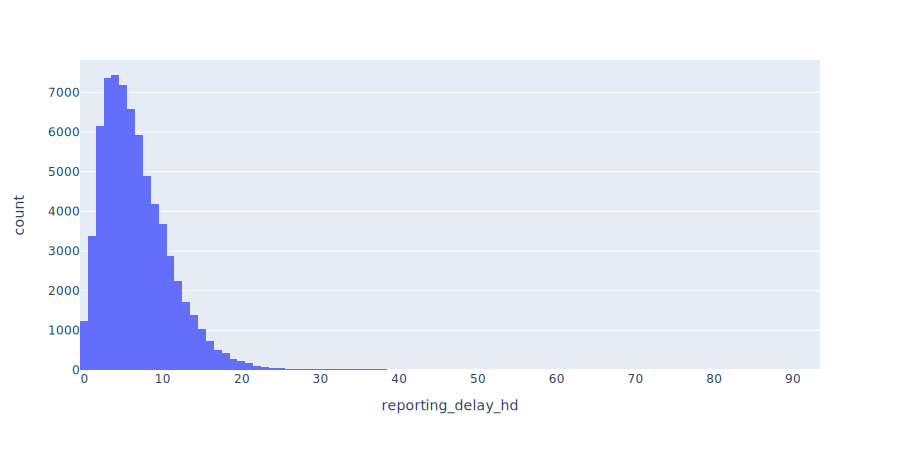

In [16]:
px.histogram(delay,x="reporting_delay_hd").show(renderer="svg",width=900)

### Time

In [19]:
delay_agg = delay.query("reporting_delay_hd>=0 & date_report>'2020-03-01'").groupby(
    ["date_report"])["reporting_delay_hd"].describe(percentiles =[0.25,0.75])

In [20]:
delay["date_report"].max()

Timestamp('2020-04-05 00:00:00')

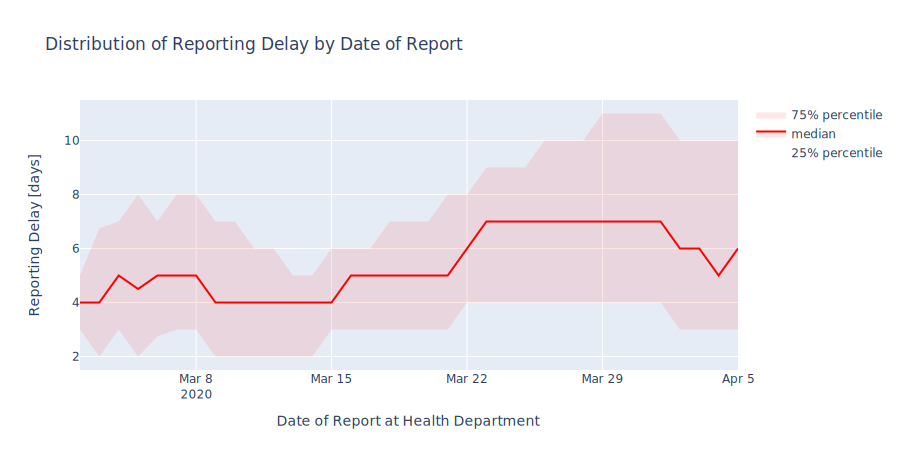

In [21]:


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=delay_agg.index,
    y=delay_agg["25%"],
    mode='lines',
        fill=None,
    line_color="rgba(0, 0, 0, 0)", showlegend=True, name="25% percentile"
))

fig.add_trace(go.Scatter(
    x=delay_agg.index,
    y=delay_agg["50%"],
    mode='lines', 
    line_color="red",
    name="median",
    fill='tonexty',
    fillcolor="rgba(255, 0, 0, 0.1)"
    ))


fig.add_trace(go.Scatter(
    x=delay_agg.index,
    y=delay_agg["75%"],
    fill='tonexty', # fill area between trace0 and trace1
    mode='lines',
    line_color="rgba(0, 0, 0, 0)",
    fillcolor="rgba(255, 0, 0, 0.1)",  showlegend=True, name="75% percentile"
))


fig.update_layout(title="Distribution of Reporting Delay by Date of Report",xaxis=dict(title="Date of Report at Health Department"),yaxis=dict(title="Reporting Delay [days]"))

fig.show(renderer="svg",width=900)

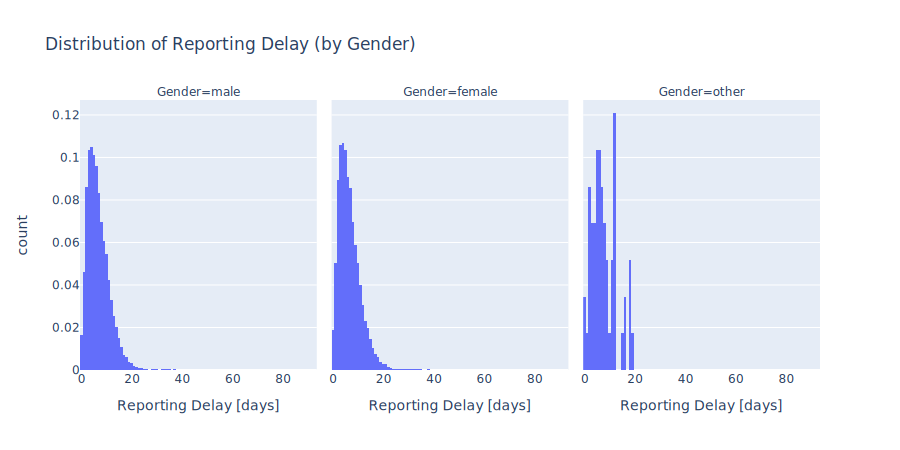

In [22]:
#px.violin(delay,x="gender", y="reporting_delay_hd", title= "Distribution of Reporting Delay (by Gender)", 
#       labels=plotlabels)

px.histogram(delay, x="reporting_delay_hd", facet_col="gender", title= "Distribution of Reporting Delay (by Gender)", 
       labels=plotlabels, histnorm='probability density').show(renderer="svg",width=900)

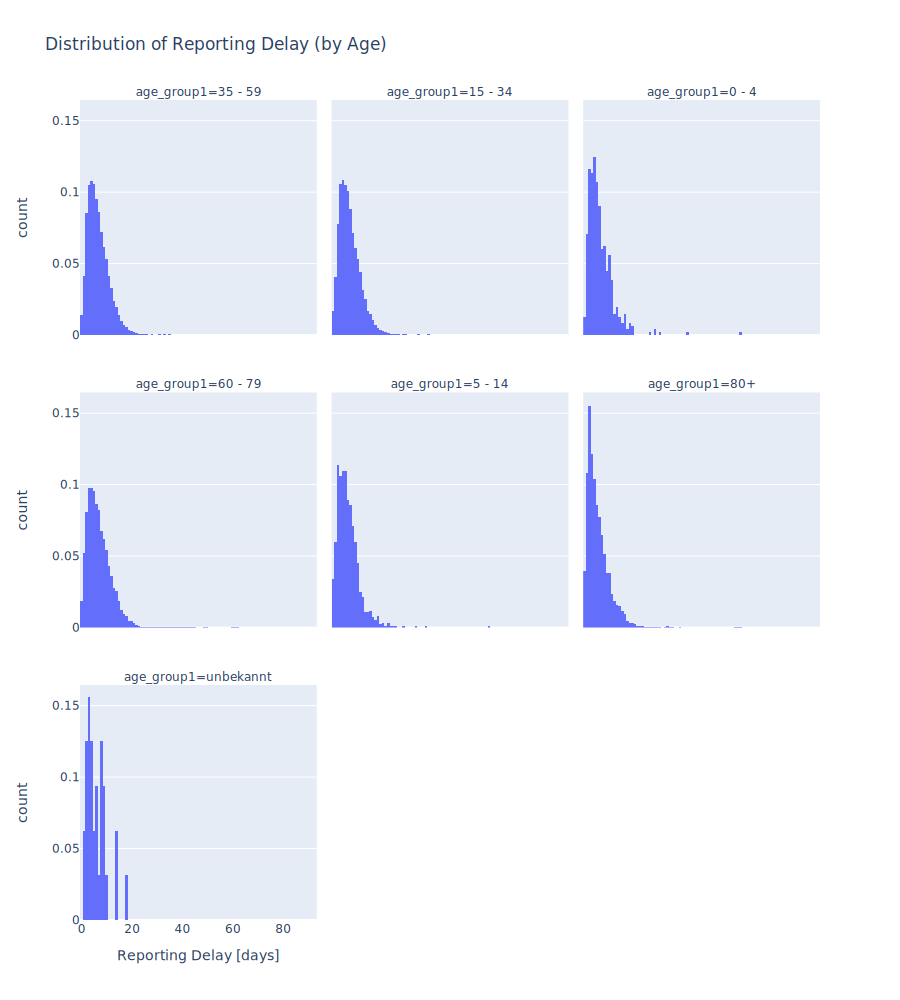

In [23]:
#px.violin(delay,x="age_group1", y="reporting_delay_hd", title= "Distribution of Reporting Delay (by Age)", 
#       labels=plotlabels)

px.histogram(delay, x="reporting_delay_hd", facet_col="age_group1", facet_col_wrap=3, title= "Distribution of Reporting Delay (by Age)", 
       labels=plotlabels, histnorm='probability').show(renderer="svg",width=900,height=1000)

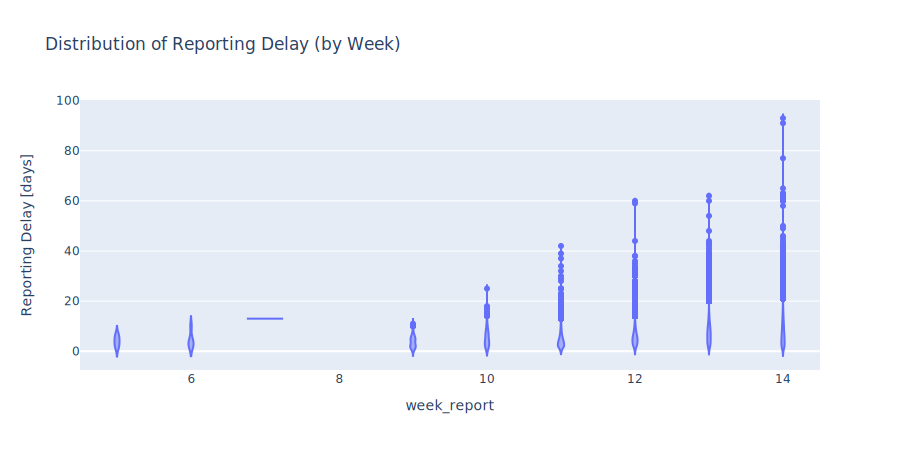

In [24]:
px.violin(delay,x="week_report", y="reporting_delay_hd", title= "Distribution of Reporting Delay (by Week)", 
       labels=plotlabels).show(renderer="svg",width=900)

#px.histogram(delay, x="reporting_delay_hd", facet_col="week_report", facet_col_wrap=3, title= "Distribution of Reporting Delay (by Week)", 
#       labels=plotlabels, histnorm='probability').show(height=1000)

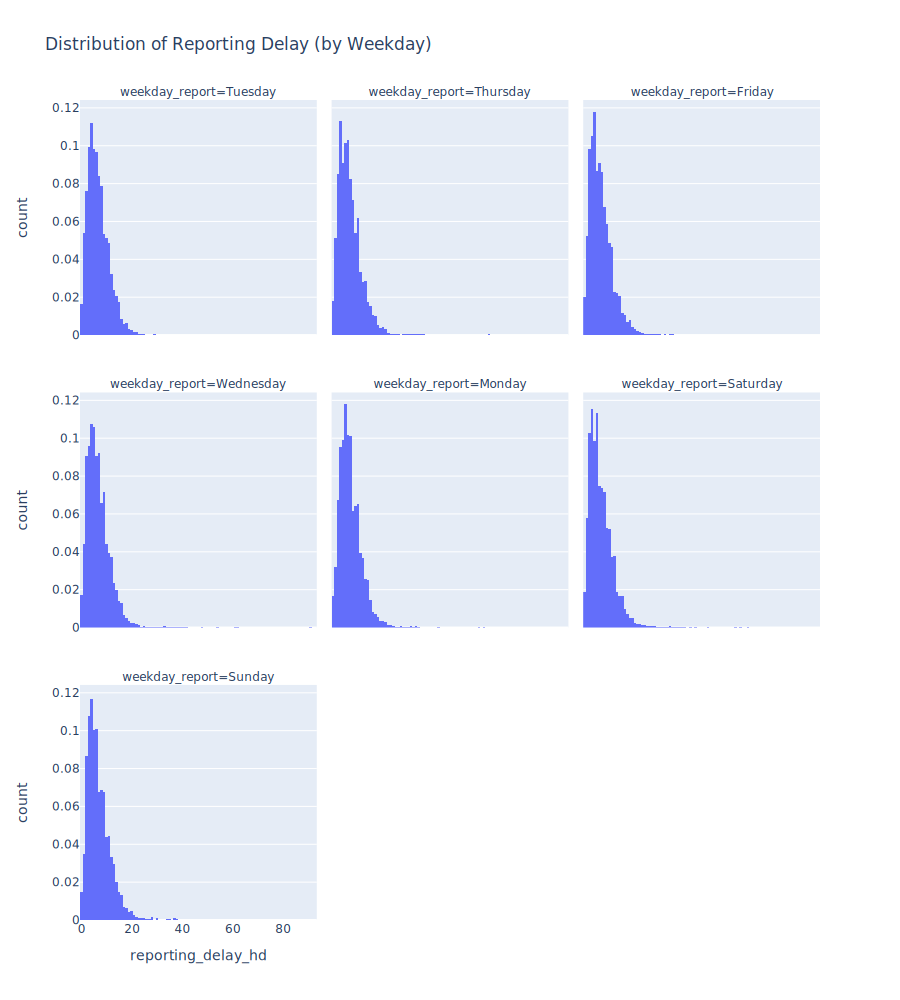

In [25]:
#px.violin(delay,x="weekday_report", y="reporting_delay_hd", title= "Distribution of Reporting Delay (by Weekday)", 
#       labels=plotlabels)

px.histogram(delay, x="reporting_delay_hd", facet_col="weekday_report", facet_col_wrap=3, title= "Distribution of Reporting Delay (by Weekday)", 
       histnorm='probability').show(renderer="svg",width=900,height=1000)

In [26]:
delay.groupby(["age_group1","gender"])["reporting_delay_hd"].mean().head(200)

age_group1  gender
0 - 4       female    6.217593
            male      6.445344
            other     3.000000
15 - 34     female    6.805006
            male      6.757255
            other     7.473684
35 - 59     female    6.722919
            male      6.863870
            other     8.625000
5 - 14      female    6.131448
            male      5.959732
            other     2.500000
60 - 79     female    7.098446
            male      7.104789
            other     8.500000
80+         female    5.227771
            male      5.673528
            other     6.500000
unbekannt   female    6.666667
            male      4.800000
            other     9.500000
Name: reporting_delay_hd, dtype: float64